Feature description

Bank client data:

1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
Related with the last contact of the current campaign:

8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
other attributes:

12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
social and economic context attributes

16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)
Output variable (desired target):

21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
bank = pd.read_csv('bank2.csv')
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [3]:
bank_full = pd.read_csv('bank-full2.csv')
bank_full.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
bank_add = pd.read_csv('bank-additional2.csv')
bank_add.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [5]:
bank_add_full = pd.read_csv('bank-additional-full2.csv')
bank_add_full.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


Objective: Predict whether or not a customer will subscribe to a term deposit

In [6]:
#Percentage of yes and no of term deposit subscription

bank_add_full['y'].value_counts()

#yes is 11.3%
#no is 88.7%

no     36548
yes     4640
Name: y, dtype: int64

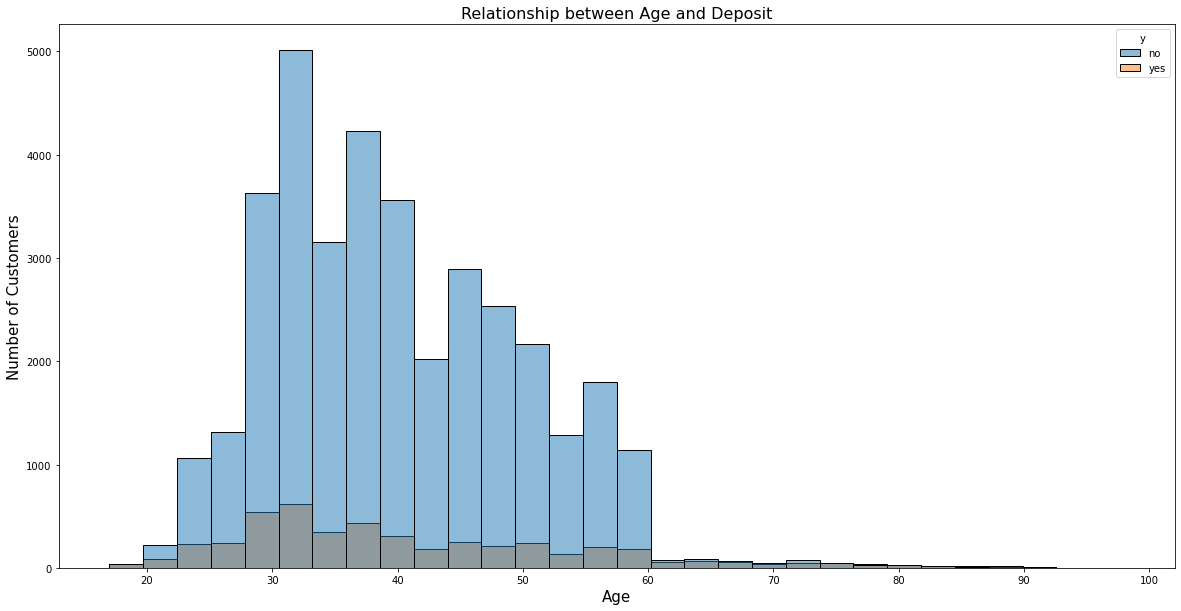

In [7]:
#AGE VS DEPOSIT 

fig_dims = (20, 10)
fig, ax = plt.subplots(figsize = fig_dims)

sns.histplot(data = bank_add_full, x = 'age', hue='y', ax = ax, alpha=0.5, bins=30);

plt.title("Relationship between Age and Deposit", fontsize=16);
plt.xlabel("Age",fontsize=15);
plt.ylabel("Number of Customers",fontsize= 15);

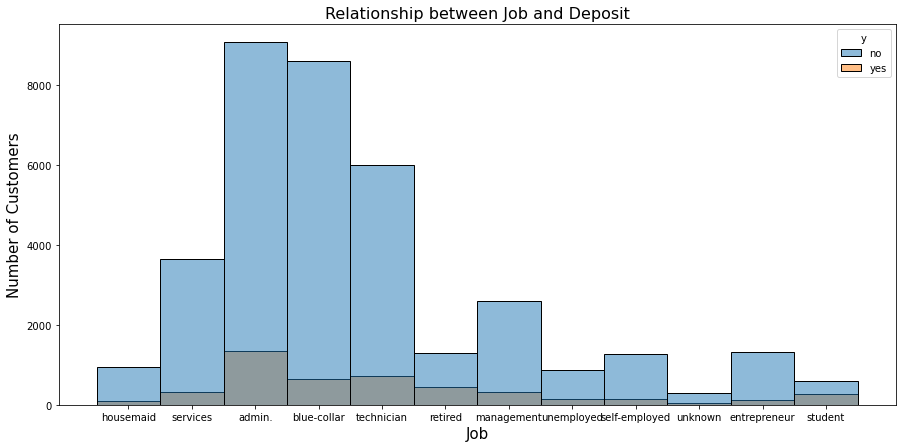

In [8]:
#JOB VS DEPOSIT 

fig_dims = (15, 7)
fig, ax = plt.subplots(figsize = fig_dims)

sns.histplot(data = bank_add_full, x = 'job', hue='y', alpha=0.5, ax = ax);

plt.title("Relationship between Job and Deposit", fontsize=16);
plt.xlabel("Job",fontsize=15);
plt.ylabel("Number of Customers",fontsize= 15);

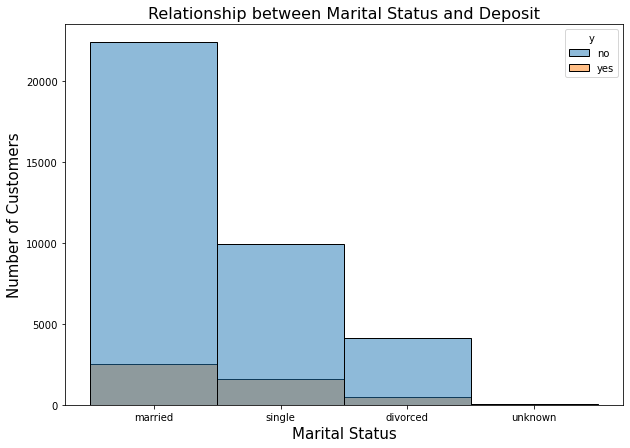

In [9]:
#MARITAL VS DEPOSIT 

fig_dims = (10, 7)
fig, ax = plt.subplots(figsize = fig_dims)

sns.histplot(data = bank_add_full, x = 'marital', hue='y', alpha=0.5, ax = ax);

plt.title("Relationship between Marital Status and Deposit", fontsize=16);
plt.xlabel("Marital Status",fontsize=15);
plt.ylabel("Number of Customers",fontsize= 15);

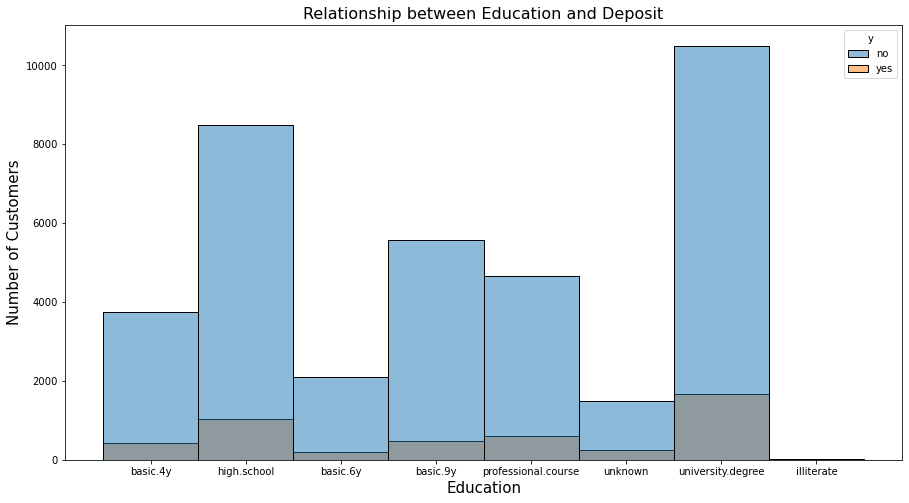

In [10]:
#EDUCATION VS DEPOSIT 
fig_dims = (15, 8)
fig, ax = plt.subplots(figsize = fig_dims)

sns.histplot(data = bank_add_full, x = 'education', hue='y', alpha=0.5, ax = ax);

plt.title("Relationship between Education and Deposit", fontsize=16);
plt.xlabel("Education",fontsize=15);
plt.ylabel("Number of Customers",fontsize= 15);

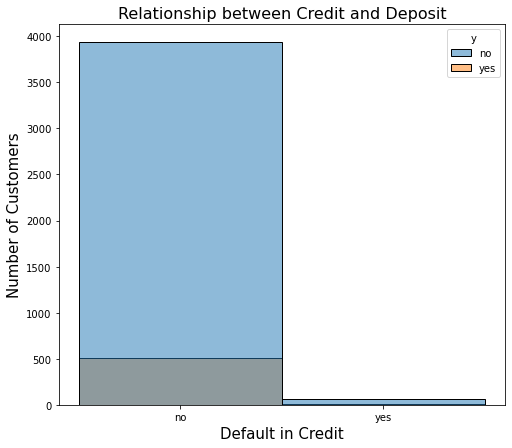

In [11]:
#CREDIT VS DEPOSIT 
fig_dims = (8, 7)
fig, ax = plt.subplots(figsize = fig_dims)

sns.histplot(data = bank, x = 'default', hue='y', alpha=0.5, ax = ax);

plt.title("Relationship between Credit and Deposit", fontsize=16);
plt.xlabel("Default in Credit",fontsize=15);
plt.ylabel("Number of Customers",fontsize= 15);

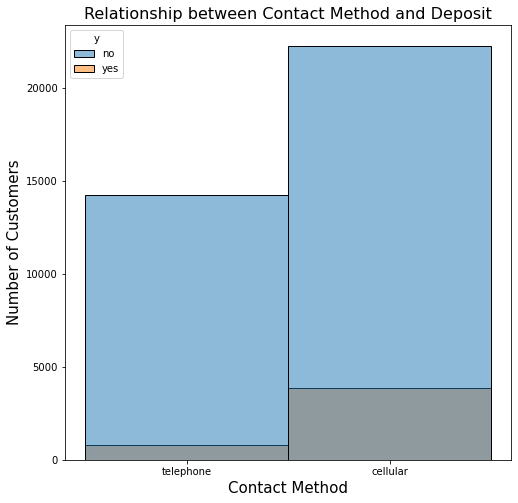

In [12]:
#CONTACT VS DEPOSIT 
fig_dims = (8, 8)
fig, ax = plt.subplots(figsize = fig_dims)

sns.histplot(data = bank_add_full, x = 'contact', hue='y', alpha=0.5, ax = ax);

plt.title("Relationship between Contact Method and Deposit", fontsize=16);
plt.xlabel("Contact Method",fontsize=15);
plt.ylabel("Number of Customers",fontsize= 15);

In [ ]:
#EMP.VAR.RATE VS DEPOSIT 
fig_dims = (15, 8)
fig, ax = plt.subplots(figsize = fig_dims)

sns.histplot(data = bank_add_full, x = 'emp.var.rate', y='y', ax = ax);

plt.title("Relationship between Employment Variation Rate and Deposit", fontsize=16);
plt.xlabel("Employment Variation Rate",fontsize=15);
plt.ylabel("Subscription of Term Deposit",fontsize= 15);

In [ ]:
#CONS.PRICE.IDX VS DEPOSIT 
fig_dims = (15, 8)
fig, ax = plt.subplots(figsize = fig_dims)

sns.histplot(data = bank_add_full, x = 'cons.price.idx', y='y', ax = ax);

plt.title("Relationship between Consumer Price Index and Deposit", fontsize=16);
plt.xlabel("Consumer Price Index",fontsize=15);
plt.ylabel("Subscription of Term Deposit",fontsize= 15);

In [ ]:
#CONS.COF.IDX VS DEPOSIT 
fig_dims = (15, 8)
fig, ax = plt.subplots(figsize = fig_dims)

sns.histplot(data = bank_add_full, x = 'cons.cof.idx', y='y', ax = ax);

plt.title("Relationship between Consumer Confidence Index and Deposit", fontsize=16);
plt.xlabel("Consumer Confidence Index",fontsize=15);
plt.ylabel("Subscription of Term Deposit",fontsize= 15);

In [ ]:
#EURIBOR3M VS DEPOSIT 
fig_dims = (15, 8)
fig, ax = plt.subplots(figsize = fig_dims)

sns.histplot(data = bank_add_full, x = 'euribor3m', y='y', ax = ax);

plt.title("Relationship between Euribor 3 Month Rate and Deposit", fontsize=16);
plt.xlabel("Employment Variation Rate",fontsize=15);
plt.ylabel("Subscription of Term Deposit",fontsize= 15);

In [ ]:
#NR.EMPLOYED VS DEPOSIT 
fig_dims = (15, 8)
fig, ax = plt.subplots(figsize = fig_dims)

sns.histplot(data = bank_add_full, x = 'nr.employed', y='y', ax = ax);

plt.title("Relationship between Number of Employees and Deposit", fontsize=16);
plt.xlabel("Number of Employees",fontsize=15);
plt.ylabel("Subscription of Term Deposit",fontsize= 15);